# Grishma Shah

# Roll No- 27


# Data Analysis on covid-19

In [ ]:
#Hello welcome to exploratory data analysis of covid-19 using Python Pandas Library.
#Dataset has information of Deaths,Recovered and confirmed Cases.

In [2]:
#Import all the libraries
import os  #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt
from datetime import datetime

%matplotlib inline

In [3]:
# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
# Increases the size of sns plots
sns.set(rc={'figure.figsize':(12,10)})

In [4]:
# Loading the cumulative raw data

raw_data_confirmed = pd.read_csv('C:\Python\COVID-19\covid19_confirmed_global.csv')
raw_data_deaths = pd.read_csv('C:\Python\COVID-19\covid19_recovered_global.csv')
raw_data_Recovered = pd.read_csv('C:\Python\COVID-19\covid19_deaths_global.csv')

print("The Shape of Confirmed is: ", raw_data_confirmed.shape)
print("The Shape of death is: ", raw_data_deaths.shape)
print("The Shape of recovred is: ", raw_data_Recovered.shape)

raw_data_confirmed.head()

The Shape of Confirmed is:  (273, 119)
The Shape of death is:  (258, 119)
The Shape of recovred is:  (273, 119)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,05-06-2020,05-07-2020,05-08-2020,05-09-2020,05-10-2020,05-11-2020,05-12-2020,5/13/20,5/14/20,5/15/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,3393,3564,3781,4042,4403,4687,4968,5227,5640,6054
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,832,842,850,856,868,872,876,880,898,916
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,4997,5182,5369,5558,5723,5891,6067,6253,6442,6629
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,751,752,752,754,755,755,758,760,761,761
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,36,36,43,43,45,45,45,45,48,48


In [5]:
raw_data_Recovered[raw_data_Recovered['Country/Region'] == 'India']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,05-06-2020,05-07-2020,05-08-2020,05-09-2020,05-10-2020,05-11-2020,05-12-2020,5/13/20,5/14/20,5/15/20
146,NaN,India,20.593684,78.96288,0,0,0,0,0,0,...,1785,1889,1985,2101,2212,2294,2415,2551,2649,2753


In [6]:
# Un-Pivoting the data

raw_data_confirmed2 = pd.melt(raw_data_confirmed, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name=['Date'])
raw_data_deaths2 = pd.melt(raw_data_deaths, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name=['Date'])
raw_data_Recovered2 = pd.melt(raw_data_Recovered, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name=['Date'])


print("The Shape of Cornirmed is: ", raw_data_confirmed2.shape)
print("The Shape of Cornirmed is: ", raw_data_deaths2.shape)
print("The Shape of Cornirmed is: ", raw_data_Recovered2.shape)


raw_data_confirmed2.head()

The Shape of Cornirmed is:  (31395, 6)
The Shape of Cornirmed is:  (29670, 6)
The Shape of Cornirmed is:  (31395, 6)


,Province/State,Country/Region,Lat,Long,Date,value
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [7]:
# Converting the new column to dates

raw_data_confirmed2['Date'] = pd.to_datetime(raw_data_confirmed2['Date'])
raw_data_deaths2['Date'] = pd.to_datetime(raw_data_deaths2['Date'])
raw_data_Recovered2['Date'] = pd.to_datetime(raw_data_Recovered2['Date'])

In [8]:
# Renaming the Values
raw_data_confirmed2.columns = raw_data_confirmed2.columns.str.replace('value', 'Confirmed')
raw_data_deaths2.columns = raw_data_deaths2.columns.str.replace('value', 'Deaths')
raw_data_Recovered2.columns = raw_data_Recovered2.columns.str.replace('value', 'Recovered')


In [9]:
# Investigating the NULL values
raw_data_Recovered2.isnull().sum()

Province/State    21735
Country/Region        0
Lat                 115
Long                115
Date                  0
Recovered             0
dtype: int64

In [10]:
# Dealing with NULL values

raw_data_confirmed2['Province/State'].fillna(raw_data_confirmed2['Country/Region'], inplace=True)
raw_data_deaths2['Province/State'].fillna(raw_data_deaths2['Country/Region'], inplace=True)
raw_data_Recovered2['Province/State'].fillna(raw_data_Recovered2['Country/Region'], inplace=True)

raw_data_confirmed2.isnull().sum()

Province/State      0
Country/Region      0
Lat               115
Long              115
Date                0
Confirmed           0
dtype: int64

In [42]:
# printing shapes before the join
print("The Shape of Confirmed is: ", raw_data_confirmed2.shape)
print("The Shape of deaths is: ", raw_data_deaths2.shape)
print("The Shape of recovered is: ", raw_data_Recovered2.shape)

The Shape of Confirmed is:  (31395, 6)
The Shape of deaths is:  (29670, 6)
The Shape of recovered is:  (31395, 6)


In [12]:
raw_data_confirmed2.isnull().sum()
raw_data_deaths2.isnull().sum()
raw_data_Recovered2.isnull().sum()

Province/State      0
Country/Region      0
Lat               115
Long              115
Date                0
Recovered           0
dtype: int64

In [13]:
raw_data_deaths2.head()

,Province/State,Country/Region,Lat,Long,Date,Deaths
0,Afghanistan,Afghanistan,33.93911,67.709953,2020-01-22,0
1,Albania,Albania,41.15330,20.168300,2020-01-22,0
2,Algeria,Algeria,28.03390,1.659600,2020-01-22,0
3,Andorra,Andorra,42.50630,1.521800,2020-01-22,0
4,Angola,Angola,-11.20270,17.873900,2020-01-22,0


In [14]:

# Full Joins

# Confirmed with Deaths
full_join = raw_data_confirmed2.merge(raw_data_deaths2[['Province/State','Country/Region','Date','Deaths']], 
                                      how = 'left', 
                                      left_on = ['Province/State','Country/Region','Date'], 
                                      right_on = ['Province/State', 'Country/Region','Date'])

print("Shape of first join: ", full_join.shape)

# full join with Recovered
full_join = full_join.merge(raw_data_Recovered2[['Province/State','Country/Region','Date','Recovered']], 
                                      how = 'left', 
                                      left_on = ['Province/State','Country/Region','Date'], 
                                      right_on = ['Province/State', 'Country/Region','Date'])

print("Shape of second join: ", full_join.shape)

full_join.head()


Shape of first join:  (31395, 7)
Shape of second join:  (31395, 8)


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Afghanistan,Afghanistan,33.93911,67.709953,2020-01-22,0,0.0,0
1,Albania,Albania,41.15330,20.168300,2020-01-22,0,0.0,0
2,Algeria,Algeria,28.03390,1.659600,2020-01-22,0,0.0,0
3,Andorra,Andorra,42.50630,1.521800,2020-01-22,0,0.0,0
4,Angola,Angola,-11.20270,17.873900,2020-01-22,0,0.0,0


In [16]:
# checking for null values (especially long and lat)
full_join.isnull().sum()

Province/State       0
Country/Region       0
Lat                115
Long               115
Date                 0
Confirmed            0
Deaths            1840
Recovered            0
dtype: int64

In [17]:
# Adding Month and Year as a new Column
full_join['Month-Year'] = full_join['Date'].dt.strftime('%b-%Y')

In [18]:

full_join.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Month-Year
0,Afghanistan,Afghanistan,33.93911,67.709953,2020-01-22,0,0.0,0,Jan-2020
1,Albania,Albania,41.15330,20.168300,2020-01-22,0,0.0,0,Jan-2020
2,Algeria,Algeria,28.03390,1.659600,2020-01-22,0,0.0,0,Jan-2020
3,Andorra,Andorra,42.50630,1.521800,2020-01-22,0,0.0,0,Jan-2020
4,Angola,Angola,-11.20270,17.873900,2020-01-22,0,0.0,0,Jan-2020


In [19]:
######################## Braking the numbers by Day #########################################
#############################################################################################

# filtering data to Anhui to give you an example

#creating a new df    
test = full_join[full_join['Province/State'] == 'Anhui']

#creating a new df    
full_join2 = test.copy()

#creating a new date columns - 1
full_join2['Date - 1'] = full_join2['Date'] + pd.Timedelta(days=1)
full_join2.rename(columns={'Confirmed': 'Confirmed - 1', 'Deaths': 'Deaths - 1', 'Recovered': 'Recovered - 1',
                          'Date': 'Date Minus 1'}, inplace=True)

#Joing on the 2 DFs
full_join3 = test.merge(full_join2[['Province/State', 'Country/Region','Confirmed - 1', 'Deaths - 1', 
                            'Recovered - 1', 'Date - 1', 'Date Minus 1']], how = 'outer',
                             left_on = ['Province/State','Country/Region','Date'], 
                             right_on = ['Province/State', 'Country/Region','Date - 1'])

# Additional Calculations
full_join3['Confirmed Daily'] = full_join3['Confirmed'] - full_join3['Confirmed - 1']


test.head()
full_join2.head()
full_join3.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Month-Year,Confirmed - 1,Deaths - 1,Recovered - 1,Date - 1,Date Minus 1,Confirmed Daily
0,Anhui,China,31.8257,117.2264,2020-01-22,1.0,0.0,0.0,Jan-2020,NaN,NaN,NaN,NaT,NaT,NaN
1,Anhui,China,31.8257,117.2264,2020-01-23,9.0,0.0,0.0,Jan-2020,1.0,0.0,0.0,2020-01-23,2020-01-22,8.0
2,Anhui,China,31.8257,117.2264,2020-01-24,15.0,0.0,0.0,Jan-2020,9.0,0.0,0.0,2020-01-24,2020-01-23,6.0
3,Anhui,China,31.8257,117.2264,2020-01-25,39.0,0.0,0.0,Jan-2020,15.0,0.0,0.0,2020-01-25,2020-01-24,24.0
4,Anhui,China,31.8257,117.2264,2020-01-26,60.0,0.0,0.0,Jan-2020,39.0,0.0,0.0,2020-01-26,2020-01-25,21.0


In [20]:
test.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Month-Year
58,Anhui,China,31.8257,117.2264,2020-01-22,1,0.0,0,Jan-2020
331,Anhui,China,31.8257,117.2264,2020-01-23,9,0.0,0,Jan-2020
604,Anhui,China,31.8257,117.2264,2020-01-24,15,0.0,0,Jan-2020
877,Anhui,China,31.8257,117.2264,2020-01-25,39,0.0,0,Jan-2020
1150,Anhui,China,31.8257,117.2264,2020-01-26,60,0.0,0,Jan-2020


In [21]:
full_join2.head()

,Province/State,Country/Region,Lat,Long,Date Minus 1,Confirmed - 1,Deaths - 1,Recovered - 1,Month-Year,Date - 1
58,Anhui,China,31.8257,117.2264,2020-01-22,1,0.0,0,Jan-2020,2020-01-23
331,Anhui,China,31.8257,117.2264,2020-01-23,9,0.0,0,Jan-2020,2020-01-24
604,Anhui,China,31.8257,117.2264,2020-01-24,15,0.0,0,Jan-2020,2020-01-25
877,Anhui,China,31.8257,117.2264,2020-01-25,39,0.0,0,Jan-2020,2020-01-26
1150,Anhui,China,31.8257,117.2264,2020-01-26,60,0.0,0,Jan-2020,2020-01-27


In [22]:
######################## Braking the numbers by Day #########################################
#############################################################################################

## Applying it on all dataset

#creating a new df    
full_join2 = full_join.copy()

#creating a new date columns - 1
full_join2['Date - 1'] = full_join2['Date'] + pd.Timedelta(days=1)
full_join2.rename(columns={'Confirmed': 'Confirmed - 1', 'Deaths': 'Deaths - 1', 'Recovered': 'Recovered - 1',
                          'Date': 'Date Minus 1'}, inplace=True)

#Joing on the 2 DFs
full_join3 = full_join.merge(full_join2[['Province/State', 'Country/Region','Confirmed - 1', 'Deaths - 1', 
                            'Recovered - 1', 'Date - 1', 'Date Minus 1']], how = 'left',
                             left_on = ['Province/State','Country/Region','Date'], 
                             right_on = ['Province/State', 'Country/Region','Date - 1'])

#minus_onedf.rename(columns={'Confirmed': 'Confirmed - 1', 'Deaths': 'Deaths - 1', 'Recovered': 'Recovered - 1'}, inplace=True)

full_join3.head()

# Additional Calculations
full_join3['Confirmed Daily'] = full_join3['Confirmed'] - full_join3['Confirmed - 1']
full_join3['Deaths Daily'] = full_join3['Deaths'] - full_join3['Deaths - 1']
full_join3['Recovered Daily'] = full_join3['Recovered'] - full_join3['Recovered - 1']

print(full_join3.shape)

(31395, 17)


In [23]:
full_join3.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Month-Year,Confirmed - 1,Deaths - 1,Recovered - 1,Date - 1,Date Minus 1,Confirmed Daily,Deaths Daily,Recovered Daily
0,Afghanistan,Afghanistan,33.93911,67.709953,2020-01-22,0,0.0,0,Jan-2020,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
1,Albania,Albania,41.15330,20.168300,2020-01-22,0,0.0,0,Jan-2020,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
2,Algeria,Algeria,28.03390,1.659600,2020-01-22,0,0.0,0,Jan-2020,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
3,Andorra,Andorra,42.50630,1.521800,2020-01-22,0,0.0,0,Jan-2020,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
4,Angola,Angola,-11.20270,17.873900,2020-01-22,0,0.0,0,Jan-2020,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN


In [24]:
# Additing manually the numbers for first day

full_join3['Confirmed Daily'].loc[full_join3['Date'] == '2020-01-22'] = full_join3['Confirmed']
full_join3['Deaths Daily'].loc[full_join3['Date'] == '2020-01-22'] = full_join3['Deaths']
full_join3['Recovered Daily'].loc[full_join3['Date'] == '2020-01-22'] = full_join3['Recovered']

# deleting columns
del full_join3['Confirmed - 1']
del full_join3['Deaths - 1']
del full_join3['Recovered - 1']
del full_join3['Date - 1']
del full_join3['Date Minus 1']

C:\Users\ADMIN PC\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [25]:
# Creating additional slicer for easy of use

full_join3['Hubei Vs Rest of the World'] = 'Rest of the World'
full_join3['Hubei Vs Rest of the World'].loc[full_join3['Province/State'] == 'Hubei'] = 'Hubei - Virus birth'

#full_join3[full_join3['Province/State'] == 'Hubei']

In [26]:
full_join3.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Month-Year,Confirmed Daily,Deaths Daily,Recovered Daily,Hubei Vs Rest of the World
0,Afghanistan,Afghanistan,33.93911,67.709953,2020-01-22,0,0.0,0,Jan-2020,0.0,0.0,0.0,Rest of the World
1,Albania,Albania,41.15330,20.168300,2020-01-22,0,0.0,0,Jan-2020,0.0,0.0,0.0,Rest of the World
2,Algeria,Algeria,28.03390,1.659600,2020-01-22,0,0.0,0,Jan-2020,0.0,0.0,0.0,Rest of the World
3,Andorra,Andorra,42.50630,1.521800,2020-01-22,0,0.0,0,Jan-2020,0.0,0.0,0.0,Rest of the World
4,Angola,Angola,-11.20270,17.873900,2020-01-22,0,0.0,0,Jan-2020,0.0,0.0,0.0,Rest of the World


In [67]:
# Exporting the data

# Setting my path
path = "C:\Python\COVID-19"

# Changing my CWD
os.chdir(path)

full_join3.to_csv('CoronaVirus PowerBI Raw', sep='\t')


In [27]:
full_join3.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Month-Year,Confirmed Daily,Deaths Daily,Recovered Daily,Hubei Vs Rest of the World
0,Afghanistan,Afghanistan,33.93911,67.709953,2020-01-22,0,0.0,0,Jan-2020,0.0,0.0,0.0,Rest of the World
1,Albania,Albania,41.15330,20.168300,2020-01-22,0,0.0,0,Jan-2020,0.0,0.0,0.0,Rest of the World
2,Algeria,Algeria,28.03390,1.659600,2020-01-22,0,0.0,0,Jan-2020,0.0,0.0,0.0,Rest of the World
3,Andorra,Andorra,42.50630,1.521800,2020-01-22,0,0.0,0,Jan-2020,0.0,0.0,0.0,Rest of the World
4,Angola,Angola,-11.20270,17.873900,2020-01-22,0,0.0,0,Jan-2020,0.0,0.0,0.0,Rest of the World


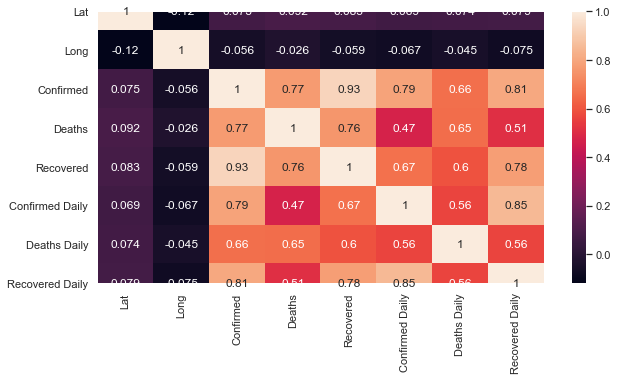

In [28]:
#Plotting heatmap 
plt.figure(figsize=(10,5))
sns.heatmap(full_join3.corr(), annot=True)

In [31]:
# 1. Countries which are affected
#Gets the individual count of each country
country_count =  full_join3['Country/Region'].value_counts()
#Get the top 10 countries by sclicing
country_count10 = country_count[:10]
print(country_count10)

China             3795
Canada            1840
France            1380
United Kingdom    1265
Australia          920
Netherlands        575
Denmark            345
Honduras           115
Eritrea            115
Bahamas            115
Name: Country/Region, dtype: int64


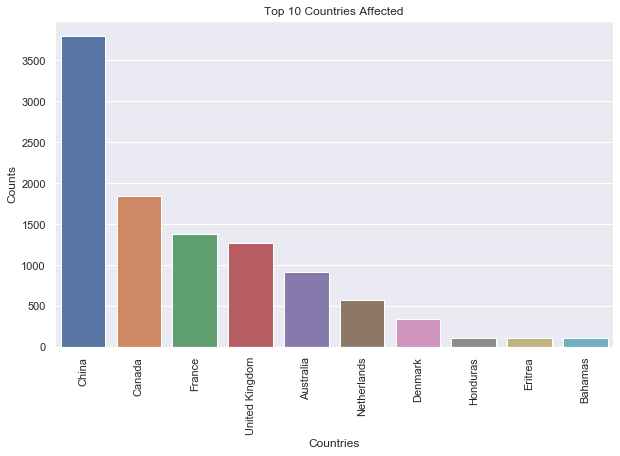

In [30]:
# Create Figure (empty canvas)
fig = plt.figure(figsize=(10,6))
sns.barplot(full_join3['Country/Region'].value_counts()[:10].index,full_join3['Country/Region'].value_counts()[:10].values)
plt.title('Top 10 Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Counts')
#Rotate the labels on X-axis so that they don't overlap
plt.xticks(rotation=90);

Text(0.5, 1.0, 'Covid Cases according to month')

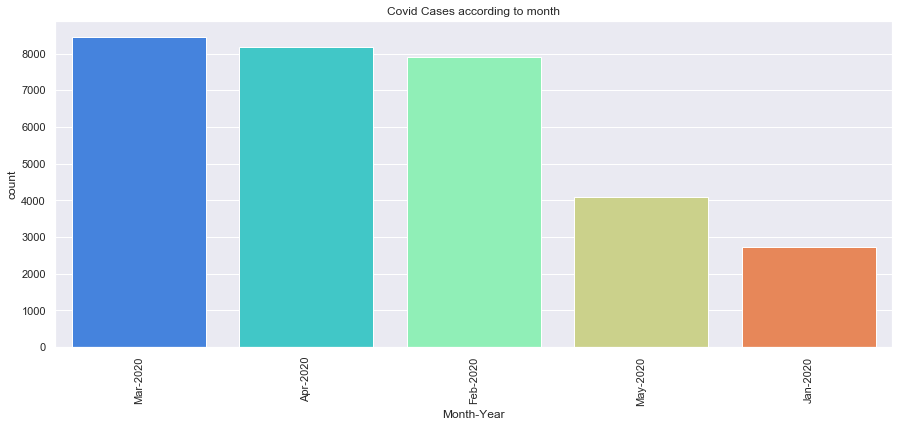

In [32]:
#2.Covid Cases according to month and year
fig=plt.figure(figsize=(15,6))
sns.countplot('Month-Year',data=full_join3,order=full_join3['Month-Year'].value_counts().index,palette='rainbow')
plt.xticks(rotation=90)
plt.xticks(rotation=90)
plt.title('Covid Cases according to month')

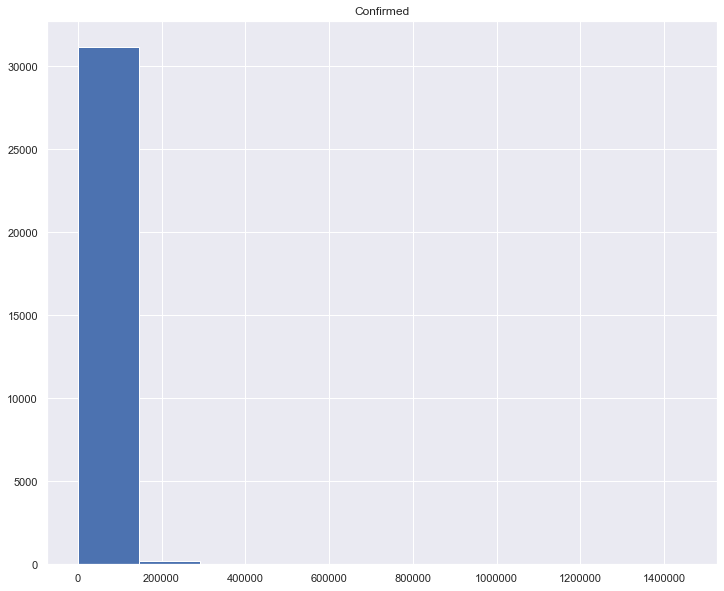

In [39]:
#2.Covid confirmed cases 
con= full_join3.hist(column='Confirmed')


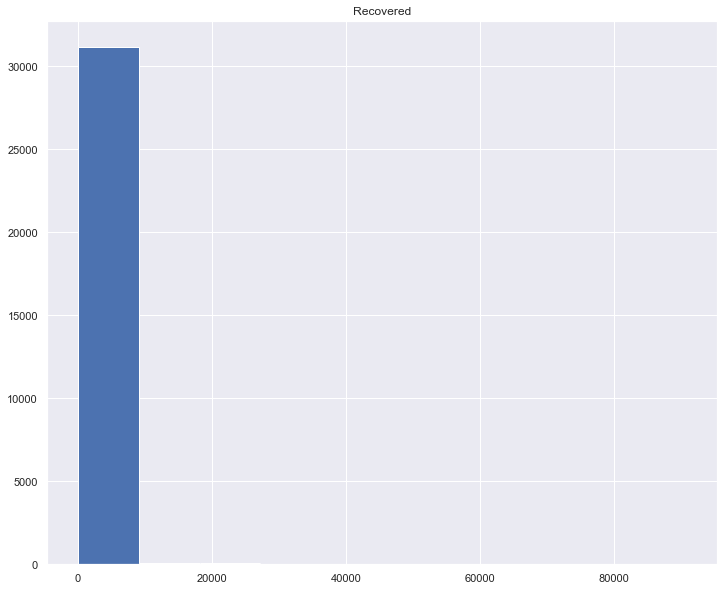

In [40]:
#2.Covid Recovered cases 
Rec= full_join3.hist(column='Recovered')


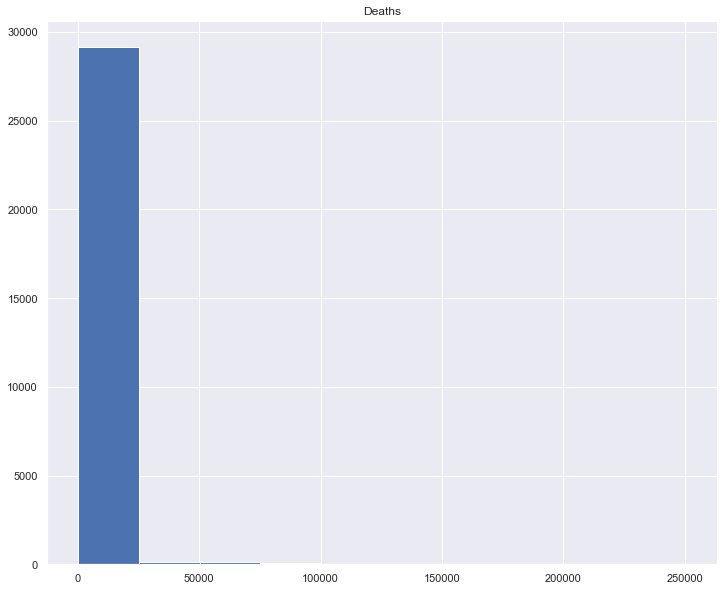

In [41]:
#2.Covid deaths 
dea= full_join3.hist(column='Deaths')


In [ ]:
############################################################################################################
############################# Creating a Dataset for play axis that duplicates data  ########################
############################################################################################################b

In [69]:
# puting unique values in list
dates = full_join3['Date'].unique()

#creating a df with unique
dates = pd.DataFrame(dates, columns=['Date'])

# Ordering df
dates = dates.sort_values(by=['Date'])

# Creating an ordered list now
dates = full_join3['Date'].unique()

print(full_join3.shape)

try:
    del concat_data
except:
    print()
    
try:
    del final_concat_data
except:
    print()
    

for i in dates:
    new_data = full_join3[full_join3['Date'] == i]
    new_data['Cumulative Date'] = i
    print(i)
    
    try:     
        concat_data = pd.concat([concat_data, new_data], ignore_index = True)
        concat_data['Cumulative Date 2'] = i
        print(concat_data['Date'].unique())
        
        try:
            final_concat_data = pd.concat([final_concat_data, concat_data], ignore_index = True)
        except:
            final_concat_data = concat_data

    except:
        concat_data = new_data
        
print(final_concat_data.shape)


(31395, 13)


2020-01-22T00:00:00.000000000
2020-01-23T00:00:00.000000000


C:\Users\ADMIN PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000']
2020-01-24T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000']
2020-01-25T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000']
2020-01-26T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000']


C:\Users\ADMIN PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\ADMIN PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



2020-01-27T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000']
2020-01-28T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000']
2020-01-29T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000' '2020-01-29T00:00:00.000000000']
2020-01-30T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'

In [70]:
# Exporting the data

final_concat_data.to_csv('CoronaVirus PowerBI Raw - Cumulative Test', sep='\t')

In [72]:
final_concat_data.head()

,Confirmed,Confirmed Daily,Country/Region,Cumulative Date,Cumulative Date 2,Date,Deaths,Deaths Daily,Hubei Vs Rest of the World,Lat,Long,Month-Year,Province/State,Recovered,Recovered Daily
0,0,0.0,Afghanistan,2020-01-22,2020-01-23,2020-01-22,0.0,0.0,Rest of the World,33.93911,67.709953,Jan-2020,Afghanistan,0,0.0
1,0,0.0,Albania,2020-01-22,2020-01-23,2020-01-22,0.0,0.0,Rest of the World,41.15330,20.168300,Jan-2020,Albania,0,0.0
2,0,0.0,Algeria,2020-01-22,2020-01-23,2020-01-22,0.0,0.0,Rest of the World,28.03390,1.659600,Jan-2020,Algeria,0,0.0
3,0,0.0,Andorra,2020-01-22,2020-01-23,2020-01-22,0.0,0.0,Rest of the World,42.50630,1.521800,Jan-2020,Andorra,0,0.0
4,0,0.0,Angola,2020-01-22,2020-01-23,2020-01-22,0.0,0.0,Rest of the World,-11.20270,17.873900,Jan-2020,Angola,0,0.0


# Insights
* The data is started from Jan 2020 to 15 may 2020
* From above datasets we can see that from starting to latest dates corona cases are Increasing day by day.
* Wheather it is confirmed case, recovered case or death case all cases are Increasing.
* We have visulized the data using power bi and created the dashboard
* From data visualization mostly effected country is US till may 15.